In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter1d
from reservoirpy.observables import rmse

C:\Users\Peter\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
print(pd.__version__)

2.2.1


In [3]:

begin = 0
end = 221966

In [4]:
df = pd.read_pickle("c:/users/peter/downloads/DF_EEG_Motion_withMOUV_SubjectPatrice.pkl")

In [5]:

dftemp = df.query('BLOCK == 6')

# Select the 21 specified variables
columns_of_interest = ['C3', 'C4', 'CZ', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FPZ',
                       'FZ', 'O1', 'O2', 'OZ', 'P3', 'P4', 'PZ', 'T3', 'T4', 'T5', 'T6']
#columns_of_interest = ['RX']

dfeeg = dftemp[columns_of_interest]

# Convert to a NumPy array
input_1 = dfeeg.to_numpy()

# Verify the shape of the resulting array
print(input_1.shape)  # Should print (n, 21) where n is the number of rows

#columns_of_interest = ['RX']
columns_of_interest = ['HX']
dfeeg = dftemp[columns_of_interest]

# Convert to a NumPy array
output_1 = dfeeg.to_numpy()

# Verify the shape of the resulting array
print(output_1.shape)  # Should print (n, 21) where n is the number of rows

(16569, 21)
(16569, 1)


In [6]:
dftemp = df.query('BLOCK == 9')

# Select the 21 specified variables
columns_of_interest = ['C3', 'C4', 'CZ', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FPZ',
                       'FZ', 'O1', 'O2', 'OZ', 'P3', 'P4', 'PZ', 'T3', 'T4', 'T5', 'T6']
#columns_of_interest = ['RX']

dfeeg = dftemp[columns_of_interest]

# Convert to a NumPy array
input_2 = dfeeg.to_numpy()

# Verify the shape of the resulting array
print(input_2.shape)  # Should print (n, 21) where n is the number of rows

#columns_of_interest = ['RX']
columns_of_interest = ['HX']
dfeeg = dftemp[columns_of_interest]

# Convert to a NumPy array
output_2 = dfeeg.to_numpy()

# Verify the shape of the resulting array
print(output_2.shape)  # Should print (n, 21) where n is the number of rows

(16573, 21)
(16573, 1)


In [7]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(units=100,sr=0.9,lr=0.01)
readout = Ridge(ridge=1e-6)

model = reservoir >> readout


In [8]:
input_1.shape
input_1 = gaussian_filter1d(input_1, sigma=20, axis=0)
input_2 = gaussian_filter1d(input_2, sigma=20, axis=0)

<function matplotlib.pyplot.show(close=None, block=None)>

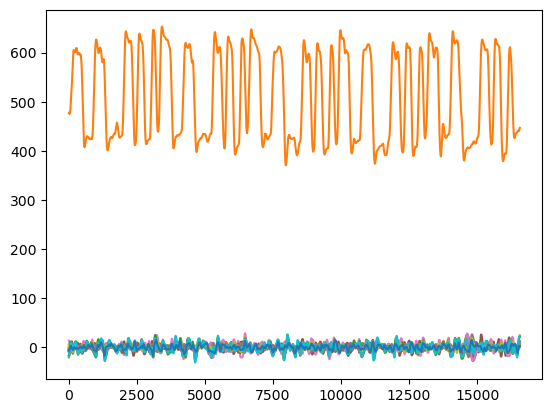

In [9]:
plt.plot(input_1)
plt.plot(output_1)
plt.show

In [10]:
U_train = input_1
Y_train = output_1

U_test = input_2
Y_test = output_2

model.fit(U_train, Y_train)


Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 145it [00:00, 1442.39it/s]                                                                            
Running Model-0: 306it [00:00, 1540.41it/s]
Running Model-0: 461it [00:00, 1370.04it/s]
Running Model-0: 601it [00:00, 1368.46it/s]
Running Model-0: 769it [00:00, 1470.55it/s]
Running Model-0: 947it [00:00, 1568.55it/s]
Running Model-0: 1106it [00:00, 1493.15it/s]
Running Model-0: 1291it [00:00, 1596.23it/s]
Running Model-0: 1453it [00:00, 1519.13it/s]
Running Model-0: 1607it [00:01, 1479.32it/s]
Running Model-0: 1757it [00:01, 1476.98it/s]
Running Model-0: 1906it [00:01, 1468.11it/s]
Running Model-0: 2074it [00:01, 1527.63it/s]
Running Model-0: 2230it [00:01, 1537.01it/s]
Running Model-0: 2385it [00:01, 1467.21it/s]
Running Model-0: 2533it [00:01, 1448.74it/s]
Running Model-0: 2679it [00:01, 1411.87it/s]
Running Model-0: 2850it [00:01, 1494.24it/s]


Fitting node Ridge-0...


'Model-0': Model('Reservoir-0', 'Ridge-0')

In [11]:
readout

'Ridge-0': Ridge(ridge=1e-06, input_bias=True, in=100, out=1)

In [12]:

Y_pred = model.run(U_test)

Running Model-0: 16573it [00:08, 1884.25it/s]                                                                          


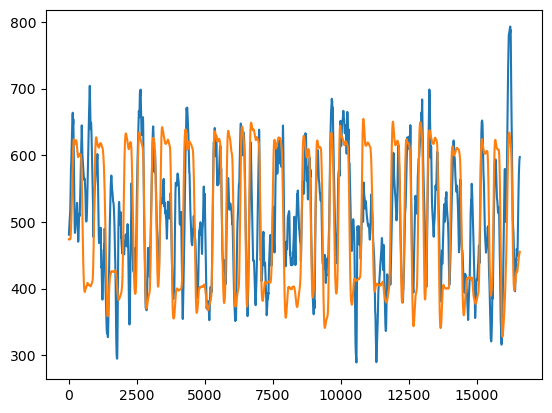

In [13]:
plt.plot(Y_pred)
plt.plot(Y_test)

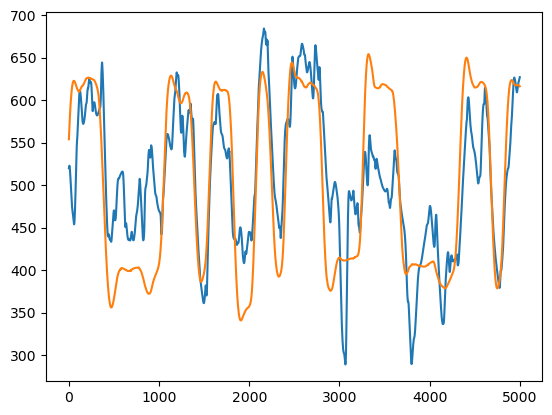

In [14]:
plt.plot(Y_pred[7500:12500])
plt.plot(Y_test[7500:12500])
plt.show()

83.75800072854787


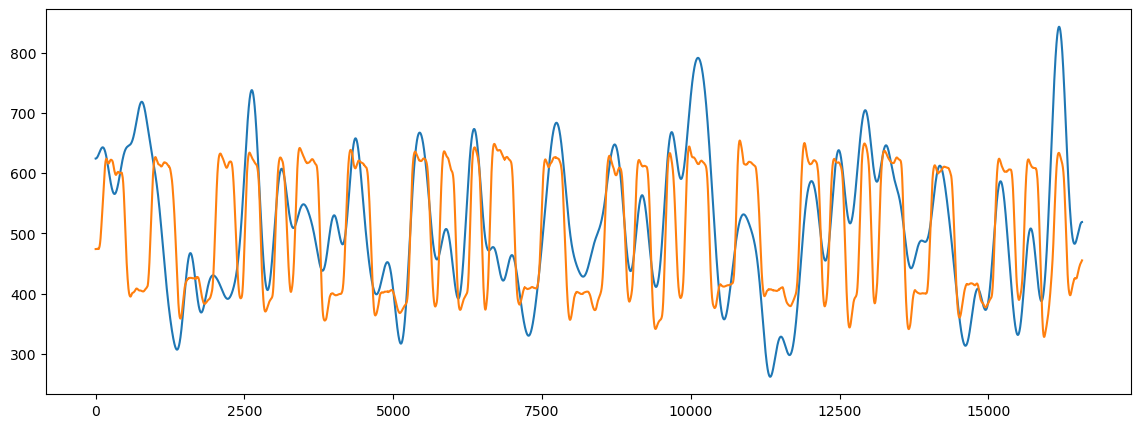

In [15]:
sigma=100
fig,ax = plt.subplots(figsize=(14,5))
plt.plot(   gaussian_filter(Y_pred[:,0], sigma=sigma)*2.2-600)
plt.plot(Y_test)
print(rmse(Y_pred, Y_test))
plt.show()

In [16]:
Y_pred.shape

(16573, 1)

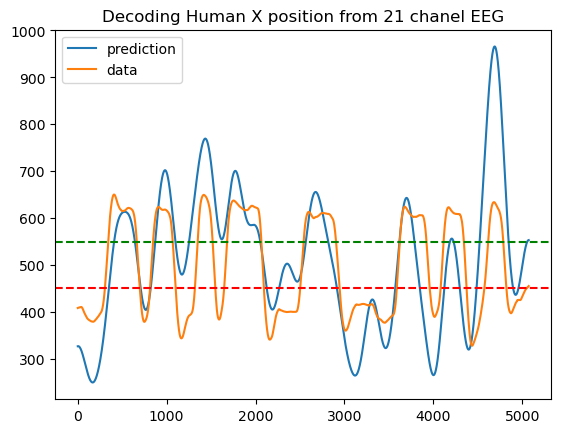

In [17]:
sigma = 80 # Standard deviation for the Gaussian kernel
smoothed_data = gaussian_filter(Y_pred[:,0], sigma=sigma)
plt.plot((smoothed_data[11500:20000]*2.5)-750,label='prediction')
#smoothed_data = gaussian_filter(Y_pred[:,1], sigma=sigma)
#plt.plot(smoothed_data[5000:10000])
plt.plot(Y_test[11500:20000],label='data')
plt.axhline(y=550, color='g', linestyle='--')  # y is the constant value for the line
plt.axhline(y=450, color='r', linestyle='--')  # y is the constant value for the line
plt.title("Decoding Human X position from 21 chanel EEG")
plt.legend()
plt.show()
a=(smoothed_data[5000:10000]*2.1)-550
b=Y_test[5000:10000]


In [18]:
a.shape

(5000,)

In [19]:
b.shape

(5000, 1)

In [20]:
print(rmse(Y_pred[5000:10000,0],Y_test[5000:10000,0]))

72.24238211621336


In [21]:
import scipy.stats as stats
stats.pearsonr(Y_pred[5000:10000,0],Y_test[5000:10000,0])

PearsonRResult(statistic=0.7314492440834554, pvalue=0.0)

In [22]:
stats.pearsonr(Y_pred[5000:10000,0],Y_test[5000:10000,0])

PearsonRResult(statistic=0.7314492440834554, pvalue=0.0)

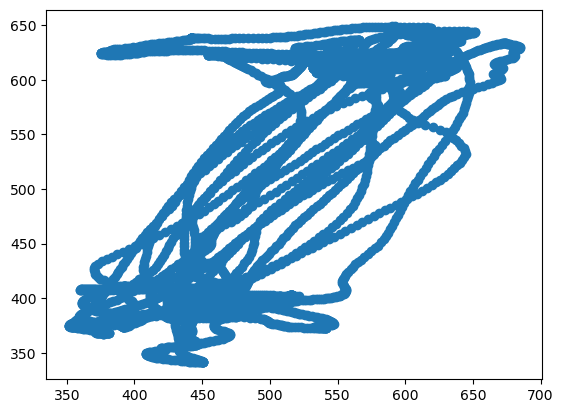

In [23]:
plt.scatter(Y_pred[5000:10000,0],Y_test[5000:10000,0])
plt.show()

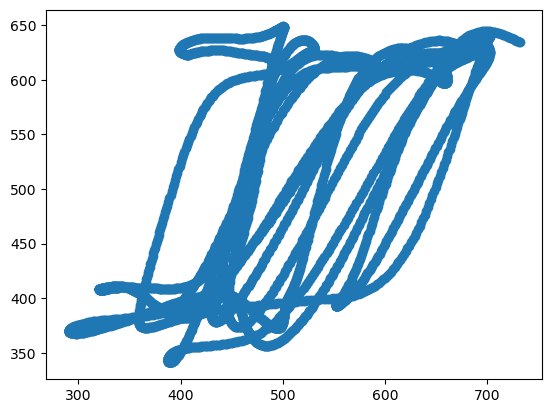

In [24]:
plt.scatter(a,b[:,0])
plt.show()